In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
bar_names = ['Cosine Similarity','L2-Norm']
setting_names = ['Normal','Pre-fine-tuned']
rouges_cos = [95.46, 97.66]
rouges_l2 = [81.29, 74.57]
rouges_cos_std = [1.77,0.47]
rouges_l2_std = [2.50,1.25]

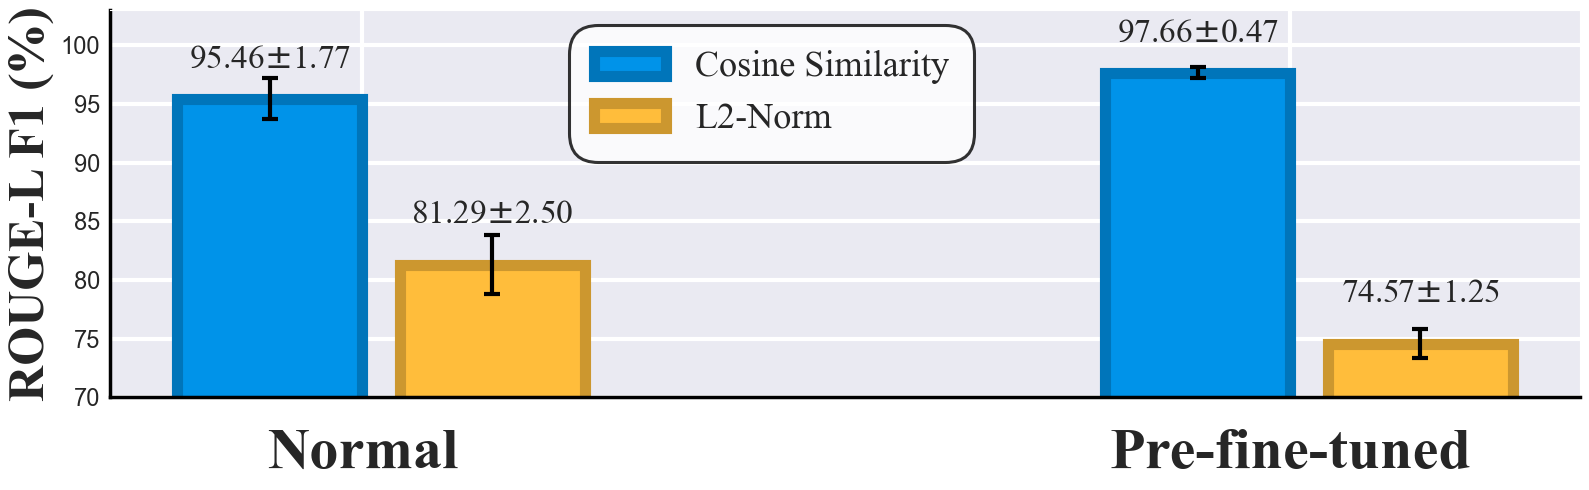

In [69]:
import seaborn as sns

custom = {'grid.alpha': 0.5}
sns.set_style("darkgrid", rc=custom)
# plot a bi-bar plot, two bars are grouped by each setting
fig, ax = plt.subplots()
# enlarge the figure
fig.set_size_inches(16, 5)
barWidth = 0.2
r1 = np.arange(len(rouges_cos))
r2 = [x + barWidth + 0.04 for x in r1]
colors = ['#0093E9', '#FFBD3B']


def make_it_darker(color, factor=0.5):
    return '#{:02x}{:02x}{:02x}'.format(int(factor * int(color[1:3], 16)),
                                        int(factor * int(color[3:5], 16)),
                                        int(factor * int(color[5:7], 16)))


error_kw = {'elinewidth': 3,  # 误差棒的线宽
            'capsize': 6,  # 误差棒帽子的宽度
            'capthick': 3,  # 误差棒帽子的厚度
            'linestyle': '-'  # 误差棒的线型
            }
ax.bar(r1, rouges_cos, yerr=rouges_cos_std, color=colors[0], width=barWidth, edgecolor=make_it_darker(colors[0], 0.8),
       linewidth=8,
       label='Cosine Similarity', error_kw=error_kw)
ax.bar(r2, rouges_l2, yerr=rouges_l2_std, color=colors[1], width=barWidth, edgecolor=make_it_darker(colors[1], 0.8),
       label='L2-Norm', linewidth=8, error_kw=error_kw)
ax.set_xticks([r + barWidth / 2 for r in range(len(rouges_cos))])
ax.set_xticklabels(setting_names, fontsize=42, fontname='Times New Roman', fontdict={'weight': 'bold'})
ax.set_ylabel('ROUGE-L F1 (%)', fontsize=36, fontname='Times New Roman', fontdict={'weight': 'bold'})

ax.tick_params(axis='y', labelsize=17)
ax.tick_params(axis='x', pad=20)
# set y lim
ax.set_ylim([70, 103])
# plot text on top of bars
for i in range(len(rouges_cos)):
    ax.text(r1[i], rouges_cos[i] + 2, f'{rouges_cos[i]}$\pm${rouges_cos_std[i]:.2f}', ha='center', va='bottom',
            fontsize=24, fontname='Times New Roman')
    ax.text(r2[i], rouges_l2[i] + 3, f'{rouges_l2[i]}$\pm${rouges_l2_std[i]:.2f}', ha='center', va='bottom',
            fontsize=24, fontname='Times New Roman')
# ax.legend()
# set legend size and background color
# plt.legend(prop={'size': 18}, frameon=True, facecolor='white',loc = 'upper center')
legend = ax.legend(fontsize=26, frameon=True, fancybox=True, shadow=False, framealpha=0.8, edgecolor='black',
                   facecolor='white', bbox_to_anchor=(0.45, 0.98),loc='upper center')
legend.get_frame().set_boxstyle("round,pad=0.3,rounding_size=0.8")
legend.get_frame().set_linewidth(2.2)
for text in ax.get_legend().get_texts():
    text.set_fontname('Times New Roman')
ax.grid(linewidth=3)
for spines in ax.spines.values():
    if spines.spine_type not in ['bottom', 'left']:
        continue
    spines.set_linewidth(2.5)
    spines.set_color('black')

plt.tight_layout()
plt.savefig('diff_loss.pdf')